In [1]:
import numpy as np
import sax
from simphony.libraries import siepic,sipann



INFO:tensorflow:Restoring parameters from C:\Users\akhil\AppData\Roaming\Python\Python312\site-packages\SiPANN\ANN\TIGHT_ANGLE_GAP/model
INFO:tensorflow:Restoring parameters from C:\Users\akhil\AppData\Roaming\Python\Python312\site-packages\SiPANN\ANN\TIGHT_ANGLE_STRAIGHT/model
INFO:tensorflow:Restoring parameters from C:\Users\akhil\AppData\Roaming\Python\Python312\site-packages\SiPANN\ANN\TIGHT_ANGLE_BENT_RAND/model


In [ ]:
##michleson
"""
key points:
2 gc
2 Y
2 wg
1 laser, detector

netlist with models
look param
circuit
sim

"""

In [2]:
netlist={
    "instances": {
        "gc1": "grating_coupler",
        "y_in": "y_couple",
        "y_out": "y_couple",
        "wg_long": "waveguide",
        "wg_short": "waveguide",
        "gc2": "grating_coupler"
    },
    "connections": {
        "gc1,o1":"y_in,port 1",
        "y_in,port 2":"wg_long,o0",
        "y_in,port 3":"wg_short,o0",
        "wg_long,o1":"y_out,port 2",
        "wg_short,o1":"y_out,port 3",
        "y_out,port 1":"gc2,o1"     

    },
    "ports":{
        "in": "gc1,o0",
        "out":"gc2,o0"
    }
}

In [3]:
circuit,info=sax.circuit(netlist=netlist,models={"waveguide":siepic.waveguide, "grating_coupler":siepic.grating_coupler, "y_couple":siepic.y_branch})

In [4]:
from simphony.classical import ClassicalSim
wl=np.linspace(1.5,1.6,1000)

sim=ClassicalSim(circuit,wl=wl,wg_long={"length" :150},wg_short={"length":50})
laseer=sim.add_laser(ports=["in"],power=1)
detector=sim.add_detector(ports=["out"])

In [5]:
result=sim.run()

<Axes: xlabel='Wavelength (um)', ylabel='Power (mW)'>

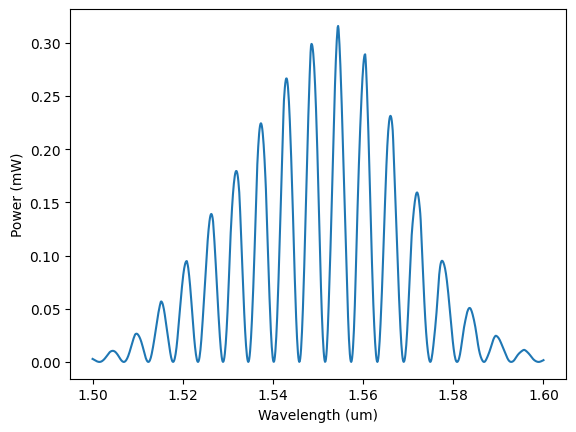

In [6]:
result.detectors["out"].plot()

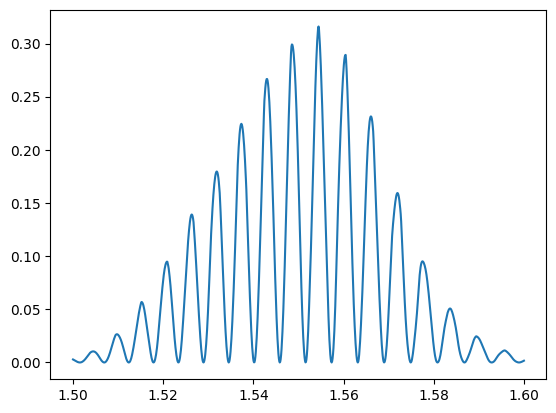

In [7]:
import matplotlib.pyplot as plt
wl=result.wl
s=result.sdict["out"]

plt.figure()
plt.plot(wl,np.abs(s**2))

In [8]:
sax.get_ports(siepic.grating_coupler)
sax.get_ports(siepic.waveguide)
sax.get_ports(siepic.y_branch)


('port 1', 'port 2', 'port 3')

In [3]:
siepic.y_branch?
siepic.p

Signature:
siepic.y_branch(
    wl: Union[float, jax.Array] = 1.55,
    pol: Literal['te', 'tm'] = 'te',
    thickness: float = 220.0,
    width: float = 500.0,
) -> Dict[Tuple[str, str], jaxtyping.Complex[Array, '...']]
Docstring:
SiEPIC EBeam PDK Y-branch model.

A y-branch efficiently splits the input 50/50 between the two outputs.
It can also be used as a combiner if used in the opposite direction,
combining and interfering the light from two inputs into the one output.

.. image:: /_static/images/ebeam_y_1550.png
    :alt: ebeam_bdc_te1550.png

Parameters
----------
pol : str, optional
    Polarization of the y-branch. Must be either 'te' (default) or 'tm'.
thickness : float, optional
    Waveguide thickness, in nanometers (default 220). Valid values
    are 210, 220, or 230 nanometers. Useful for simulating manufacturing
    variability.
width : float, optional
    Waveguide width, in nanometers (default 500 nanometers). Valid values
    are 480, 500, or 520 nanometers.

Notes
--